In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
import gym
import sys

from animations import save_ani
%matplotlib inline
%load_ext autoreload
%autoreload 2

print(f'sys.version: {sys.version}')
print(f'gym.version: {gym.__version__}')

sys.version: 3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 19:16:44) 
[GCC 7.3.0]
gym.version: 0.10.9


In [2]:
env = gym.make('Breakout-v0')

In [3]:
print(dir(env))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_elapsed_seconds', '_elapsed_steps', '_episode_started_at', '_max_episode_seconds', '_max_episode_steps', '_past_limit', 'action_space', 'class_name', 'close', 'compute_reward', 'env', 'metadata', 'observation_space', 'render', 'reset', 'reward_range', 'seed', 'spec', 'step', 'unwrapped']


In [4]:
s = env.reset()
a = env.action_space.sample()
print(f'env.action_space.n: {env.action_space.n}')
print(f'random action: {a}')

env.action_space.n: 4
random action: 0


In [5]:
print(f'Num_Actions: {env.action_space.n}')
action_meanings = env.unwrapped.get_action_meanings()
for i in range(env.action_space.n):
    print(f'{i}: {action_meanings[i]}')

Num_Actions: 4
0: NOOP
1: FIRE
2: RIGHT
3: LEFT


In [6]:
print(dir(env))
print(dir(env.env))
print(env.env.seed(67))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_elapsed_seconds', '_elapsed_steps', '_episode_started_at', '_max_episode_seconds', '_max_episode_steps', '_past_limit', 'action_space', 'class_name', 'close', 'compute_reward', 'env', 'metadata', 'observation_space', 'render', 'reset', 'reward_range', 'seed', 'spec', 'step', 'unwrapped']
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '_

In [7]:
def run(env):
    print(f'env.env.seed(67): {env.env.seed(67)}')
    s = env.reset()
    frames = [s]
    env.render()
    done = False
    step = 0
    a = 0
    total_reward = 0

    while not done:
        s, r, done, _ = env.step(a)
        total_reward += r
        frames.append(s)
        env.render()
        a = env.action_space.sample()
        
    return frames, total_reward

In [8]:
frames, total_reward = run(env)

env.env.seed(67): [67, 168085630]


In [9]:
print(len(frames))
print(frames[0].shape)
print(frames[0].min(), frames[0].max())

296
(210, 160, 3)
0 200


In [10]:
def plot_frames(frames, rows=3, cols=4, step_length=5):
    plt.figure(figsize=(5*cols, 5*rows))
    subplot_idx = 0

    for idx in range(0, len(frames), step_length):
        subplot_idx += 1
        plt.subplot(rows, cols, subplot_idx)
        plt.title(f'step {idx}')
        plt.axis('off')
        plt.imshow(frames[idx])

        if subplot_idx >= rows * cols:
            break

    plt.show()

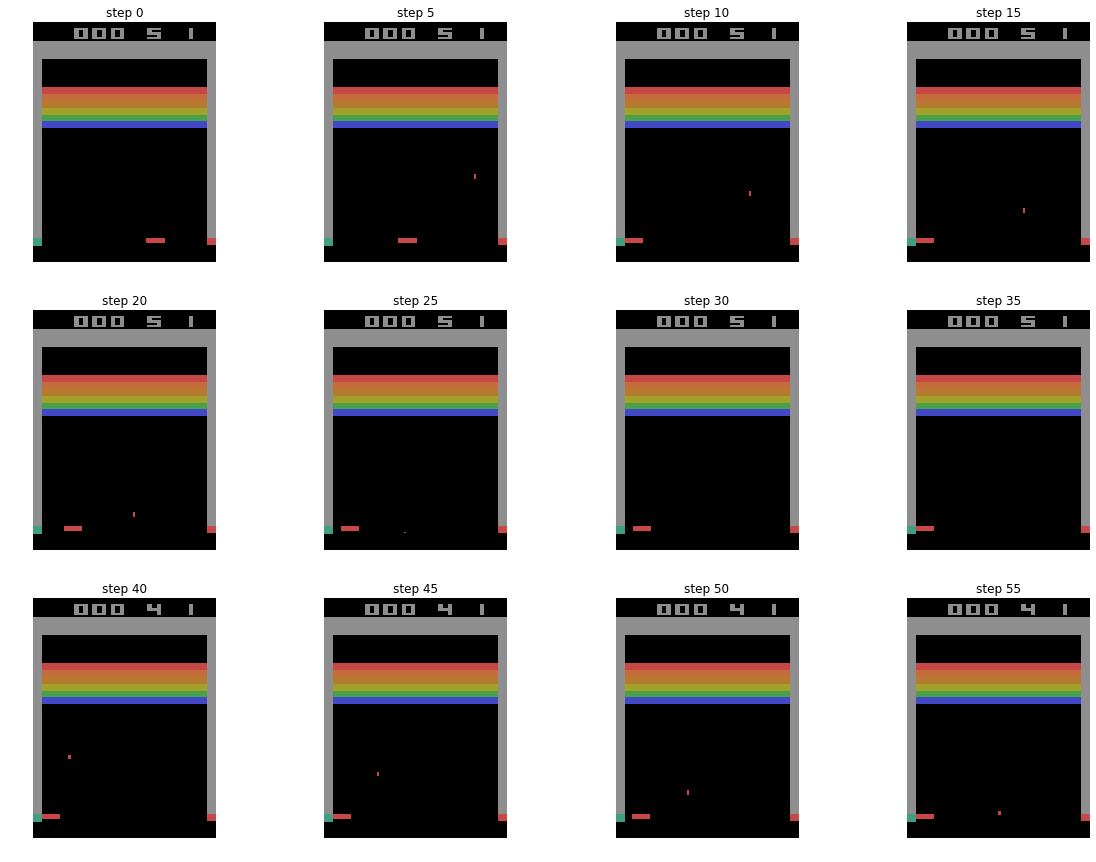

In [11]:
plot_frames(frames)

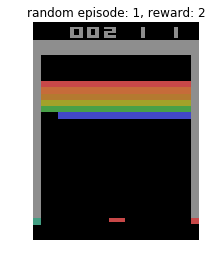

In [12]:
save_ani(1, int(total_reward), frames, fps=15, skip_frames=2, 
         out_path='./animations/playground/', mode='random')